In [1]:
%matplotlib widget

In [2]:
# initialization
from rayoptics.environment import *

from rayoptics.optical import analyses
from rayoptics.mpl.analysisfigure import Wavefront, RayFanPlot, AnalysisFigure

from matplotlib import gridspec

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
app = AppManager(None)
opm = app.model = OpticalModel()
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [5]:
sm.gaps[0].thi = 1e10

In [6]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air   transmit  1      1.0000
 Img:     0.000000      0.00000             transmit  1      1.0000


In [7]:
osp.pupil.key, osp.pupil.value

(('aperture', 'object', 'pupil'), 1.0)

In [8]:
osp.pupil.value=22
opm.update_model()

In [9]:
opm.add_from_file(root_pth/"codev/tests/CODV_32327.seq", t=10.)

In [10]:
opm.update_model()

In [11]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air   transmit  1      0.0000
32327:     0.016268      6.00000     N-BK7   transmit  1      12.000
   2:    -0.022401      2.50000     N-SF5   transmit  1      11.781
   3:    -0.007696      10.0000       air   transmit  1      12.000
 Img:     0.000000      0.00000             transmit  1      10.385


In [13]:
opm.ele_model.list_elements()

0: E1 (Element): Element: Spherical(c=0.0162680982593135), Spherical(c=-0.022401433691756303), t=6.0000, sd=12.0000, glass: N-BK7
1: E2 (Element): Element: Spherical(c=-0.022401433691756303), Spherical(c=-0.007695859627520387), t=2.5000, sd=12.0000, glass: N-SF5
2: AirGap (AirGap): Gap(t=10.0, medium=Air)


In [14]:
opm.add_from_file(root_pth/"codev/tests/CODV_49664.seq", t=17.8)

In [15]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air   transmit  1      0.0000
32327:     0.016268      6.00000     N-BK7   transmit  1      12.000
   2:    -0.022401      2.50000     N-SF5   transmit  1      11.781
   3:    -0.007696      10.0000       air   transmit  1      12.000
49663:     0.042553      9.00000   S-LAL 8   transmit  1      12.629
   5:    -0.027248      2.50000   S-TIH53   transmit  1      11.842
   6:     0.000000    0.0800000    517.52   transmit  1      11.004
   7:    -0.003096      17.8000       air   transmit  1      10.990
 Img:     0.000000      0.00000             transmit  1      10.385


In [16]:
osp.field_of_view.key, osp.field_of_view.max_field()

(('field', 'object', 'angle'), (0.0, None))

In [17]:
opm.update_model()

In [18]:
pm.first_order_data()

efl               28.86
ffl              -16.07
pp1               12.79
bfl               17.96
ppk                10.9
f/#               1.203
m              0.005673
red          -3.464e+08
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius           12
na obj          1.2e-09
n obj                 1
img_dist           17.8
img_ht           0.5038
exp_dist         -33.88
exp_radius        21.55
na img          -0.3839
n img                 1
optical invariant       0.2095


In [19]:
opm.ele_model.list_elements()

0: E1 (Element): Element: Spherical(c=0.0162680982593135), Spherical(c=-0.022401433691756303), t=6.0000, sd=12.0000, glass: N-BK7
1: E2 (Element): Element: Spherical(c=-0.022401433691756303), Spherical(c=-0.007695859627520387), t=2.5000, sd=12.0000, glass: N-SF5
2: AirGap (AirGap): Gap(t=10.0, medium=Air)
3: E1 (Element): Element: Spherical(c=0.04255319148936201), Spherical(c=-0.02724795640327), t=9.0000, sd=10.1086, glass: S-LAL 8
4: E2 (Element): Element: Spherical(c=-0.02724795640327), Spherical(c=0.0), t=2.5000, sd=8.6079, glass: S-TIH53
5: E3 (Element): Element: Spherical(c=0.0), EvenPolynomial(c=-0.003095913950326, cc=0.0, coefs=[0.0, 1.38925111836e-05, -2.08175206307e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), t=0.0800, sd=7.8272, glass: 517.52
6: AirGap (AirGap): Gap(t=17.8, medium=Air)


## change the element semidiameters to something manufacturable

In [25]:
opm.ele_model.elements[0].sd = 12.5
opm.ele_model.elements[1].sd = 12.5
opm.ele_model.elements[3].sd = 12.5
opm.ele_model.elements[4].sd = 12.5
opm.ele_model.elements[5].sd = 12.5

## increase the max aperture on the cemented surfaces to avoid flats on the concave surfaces

In [34]:
sm.ifcs[2].max_aperture=12.5
sm.ifcs[5].max_aperture=12.5

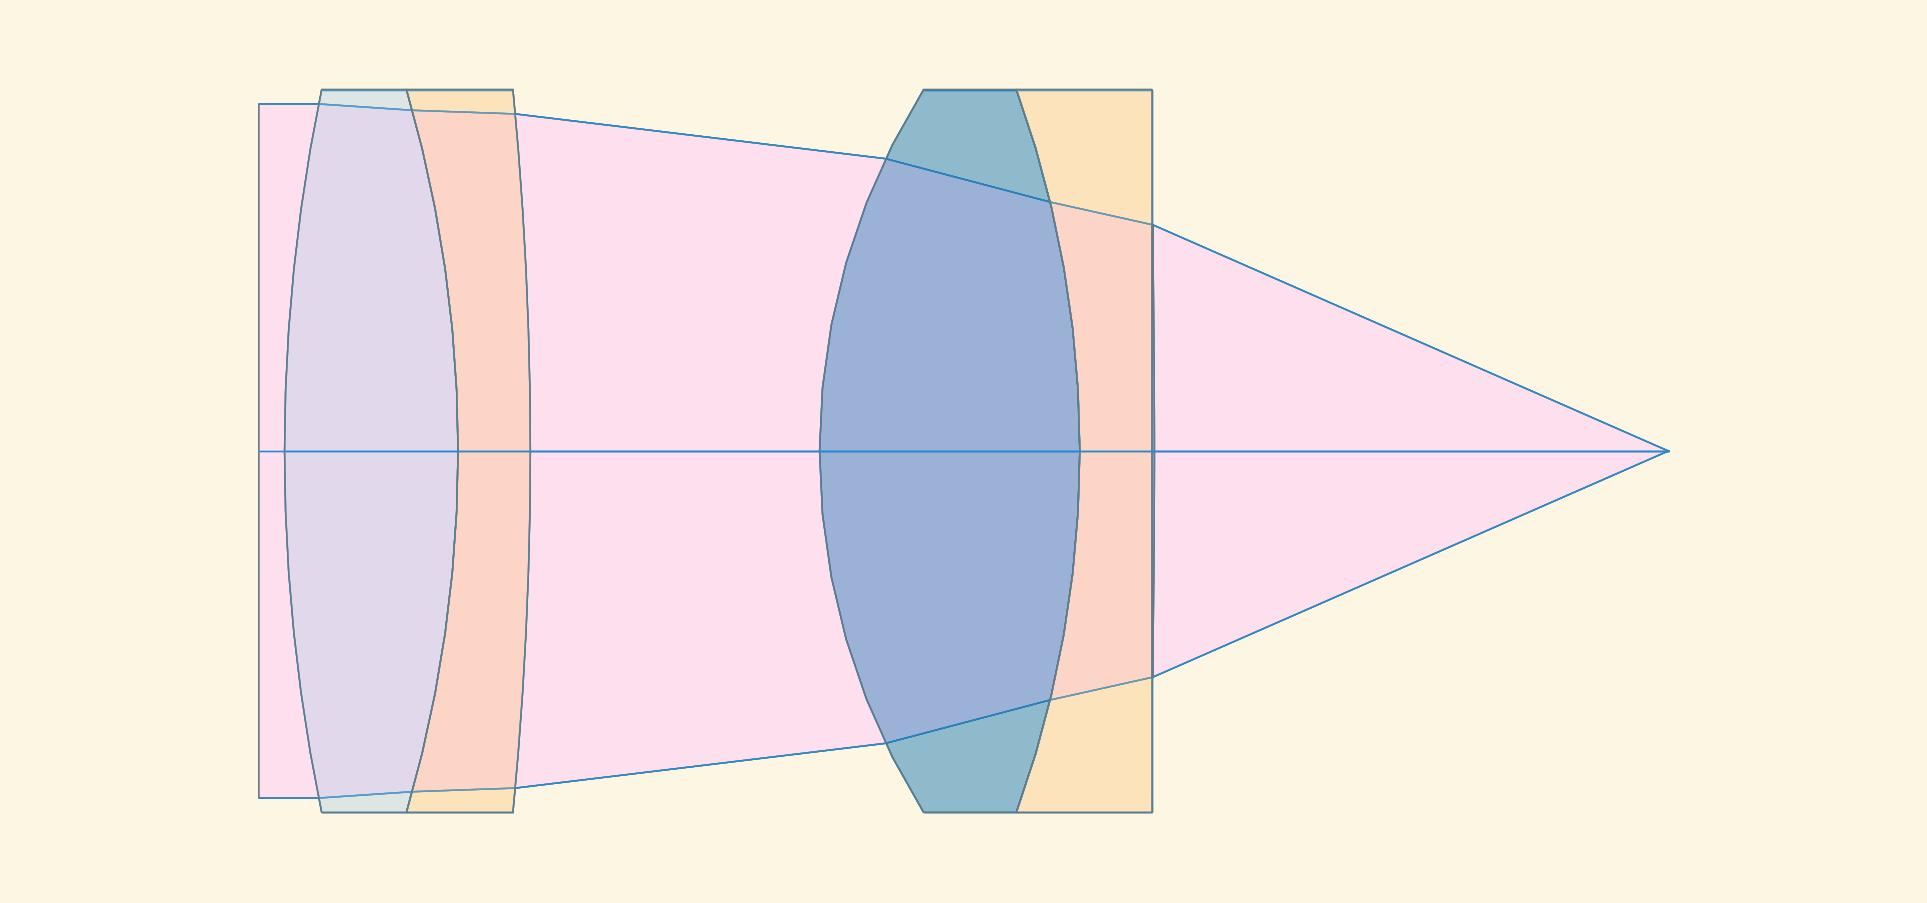

In [35]:
layout_plt.refresh()
layout_plt.plot()

In [21]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray',
                     scale_type=Fit.All_Same).plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
osp.spectral_region.set_from_list([[656., 1], [587., 2], [488., 1]])
osp.spectral_region.reference_wvl = 1

In [23]:
opm.update_model()

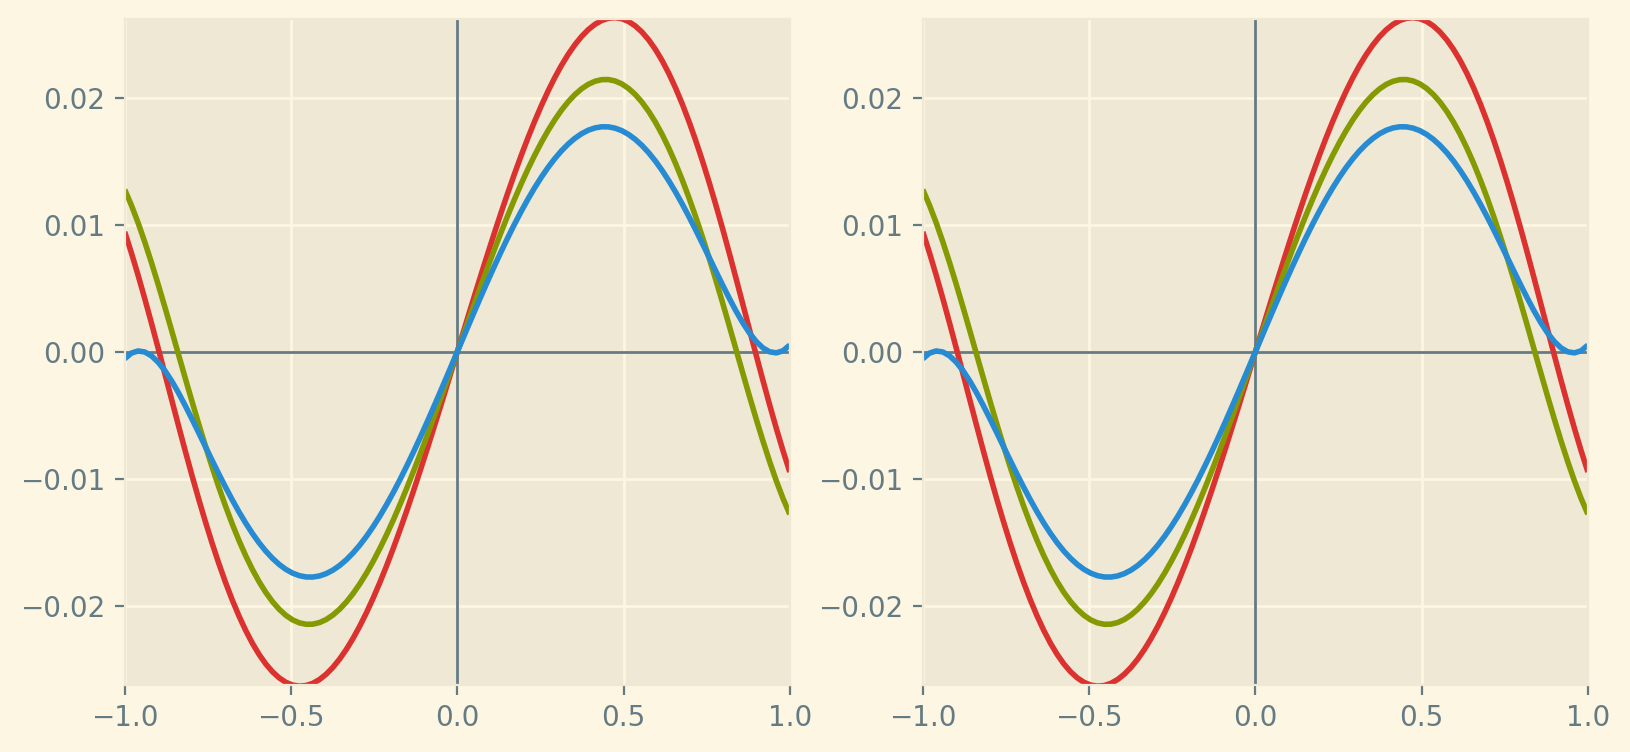

In [24]:
abr_plt.update_data()
abr_plt.plot()

## 